In [342]:
# General imports
from math import pi
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from scipy import signal as sig
from scipy.fft import fft, ifft, ifftshift, fftfreq

In [343]:
# Syle file for plotting
plt.style.use("LateLightStyle.mplstyle")

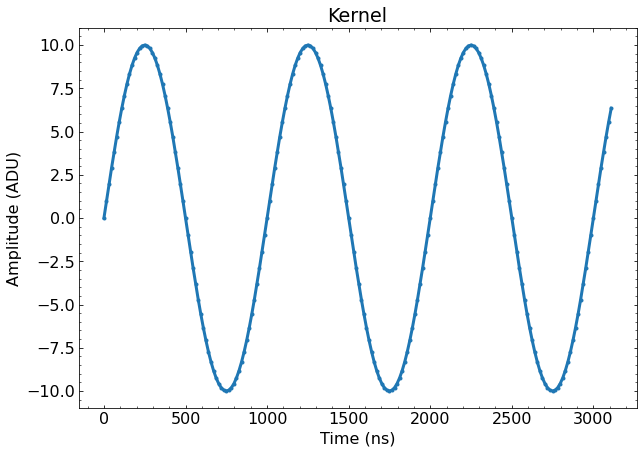

In [376]:
# Generate original signal

#Frequency
freq = 1/1000
ampli = 10
sample = np.arange(0,200)*15.625
kernel = ampli*np.sin(2*np.pi*freq*sample)

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(sample, kernel, marker=".")
ax.set_title("Kernel")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#ax.set_ylim(-10,40)
#ax.set_xlim(1.5e8,3.5e8)
plt.show()

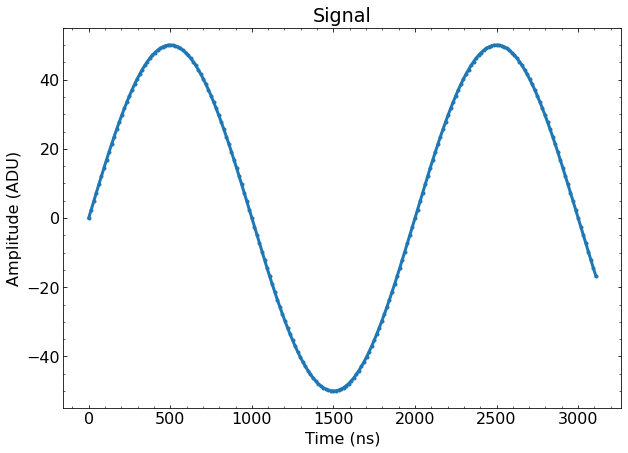

In [377]:
# Generate the signal

ucovsignal = 5*ampli*np.sin(2*np.pi*freq/2*sample)

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(sample, ucovsignal, marker=".")
ax.set_title("Signal")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#ax.set_ylim(-10,40)
#ax.set_xlim(1.5e8,3.5e8)
plt.show()

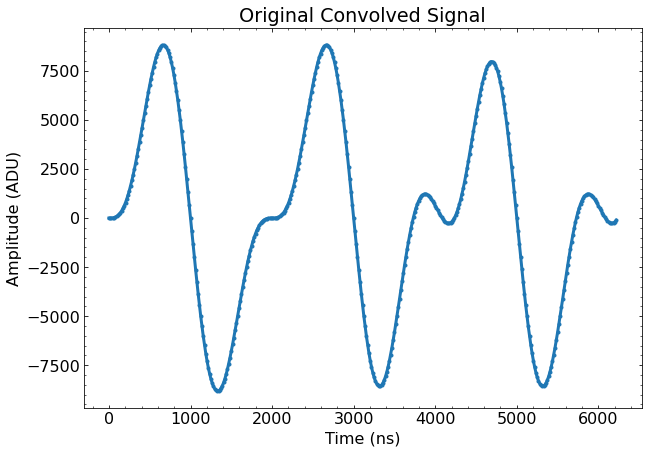

In [470]:
# Convolve the kernel with some signals

signal = sig.convolve(kernel, ucovsignal)
lsample = np.arange(0,399)*15.625

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(lsample, signal, marker=".")
ax.set_title("Original Convolved Signal")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#ax.set_ylim(-10,40)
#ax.set_xlim(1.5e8,3.5e8)
plt.show()

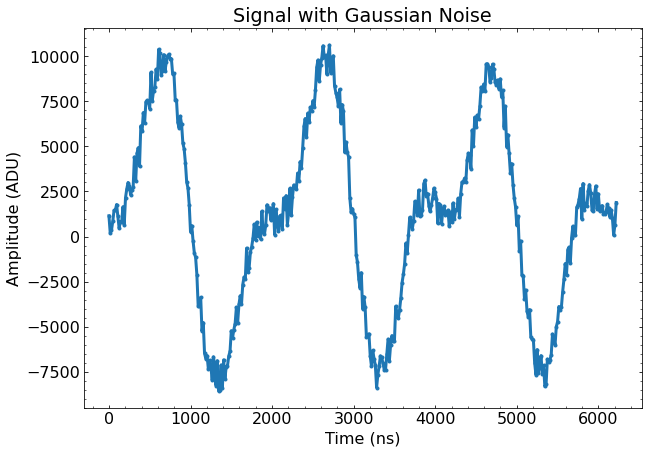

In [472]:
# Introduce noise to the signal

namp = 2000
nsig = [i+namp*np.random.random() for i in signal]

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(lsample, nsig, marker=".")
ax.set_title("Signal with Gaussian Noise")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#ax.set_ylim(-10,40)
#ax.set_xlim(1.5e8,3.5e8)
plt.show()

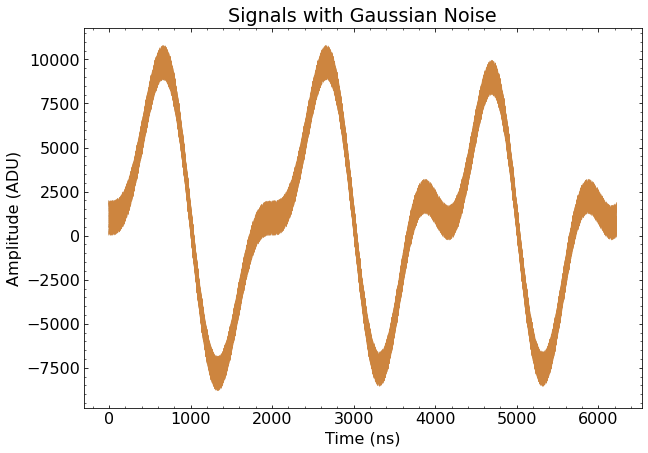

In [473]:
# Generate a set of 500 noisy signals and take average to create kernel

nsigs = []

for i in range(500):
    nsigs.append([j+namp*np.random.random() for j in signal])

# Generate kernel
#kernel = [np.mean([nsigs[i][j] for i in range(len(nsigs))]) for j in range(len(nsigs[0]))]

fig, ax = plt.subplots(figsize =(10, 7))
for i in nsigs:
    ax.plot(lsample, i, color="peru", linewidth=0.1)
#ax.plot(sample, kernel, marker=".")
ax.set_title("Signals with Gaussian Noise")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#ax.set_ylim(500,1000)
#ax.set_xlim(1.5e8,3.5e8)
plt.show()

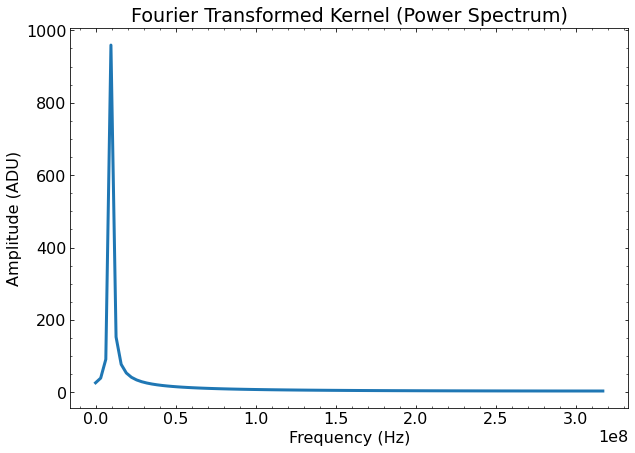

In [380]:
# Generate power spectrum of the kernel

n = len(sample)

knft = fft(kernel)
knfreq = fftfreq(n, d=15.625)

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(knfreq[:n//2]*10e9, np.abs(knft[0:n//2]))
ax.set_title("Fourier Transformed Kernel (Power Spectrum)")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#ax.set_ylim(-2,2)
#ax.set_xlim(10,30)
plt.show()

F:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


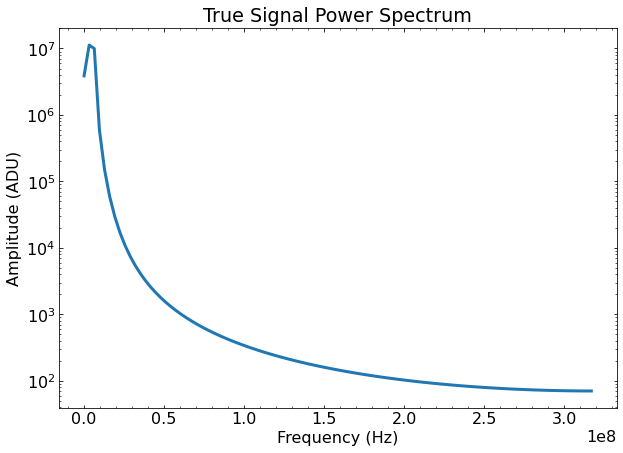

In [417]:
# Generate power spectrum of the true signal

sft = fft(ucovsignal)
sfreq = fftfreq(n, d=15.625)

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(sfreq[:n//2]*10e9, (sft*np.conj(sft))[0:n//2])
ax.set_title("True Signal Power Spectrum")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (ADU)")
ax.set_yscale("log")
#ax.set_ylim(-2,2)
#ax.set_xlim(10,30)
plt.show()

F:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


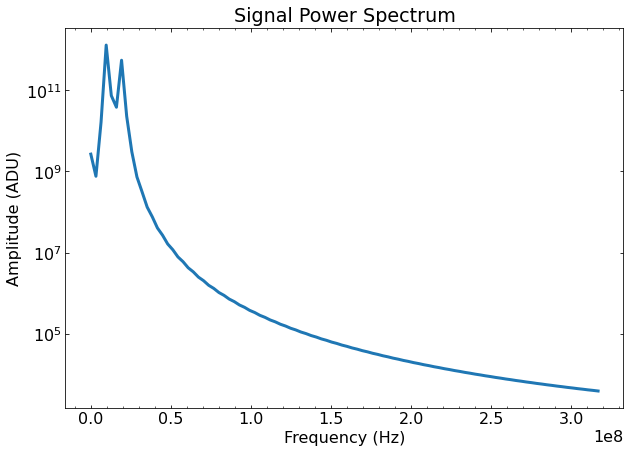

In [403]:
# Generate Power Spectrum of the original signal

kft = fft(signal)
kfreq = fftfreq(n, d=15.625)

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(kfreq[:n//2]*10e9, (kft*np.conj(kft))[0:n//2])
ax.set_title("Signal Power Spectrum")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (ADU)")
ax.set_yscale("log")
#ax.set_ylim(-2,2)
#ax.set_xlim(10,30)
plt.show()

F:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


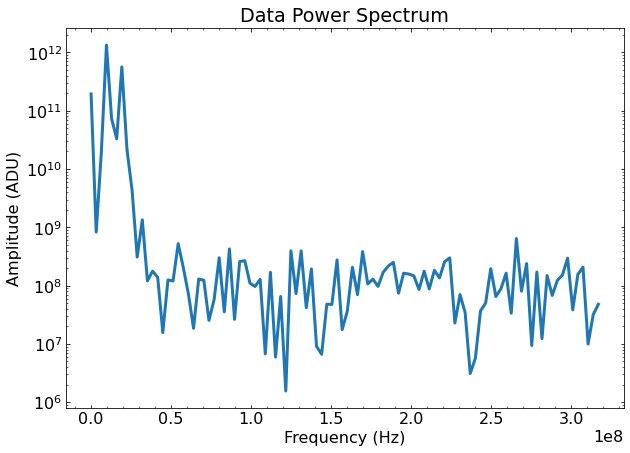

In [404]:
# Example of the power spectrum of a noisy signal

wft = fft(nsigs[0])

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(kfreq[:n//2]*10e9, (wft*np.conj(wft))[0:n//2])
ax.set_title("Data Power Spectrum")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (ADU)")
ax.set_yscale("log")
#ax.set_ylim(-2,2)
#ax.set_xlim(10,30)
plt.show()

In [467]:
# Generate power spectrum of all noisy waveforms and take average

specsum = np.zeros(len(nsigs[0]), dtype="complex")

m=0
for i in range(len(nsigs)):
    fft_cache = fft(nsigs[i])
    #specsum += fft_cache*np.conj(fft_cache)
    #specsum += fft_cache
    #specsum += fft_cache*np.conj(fft_cache)-kft*np.conj(kft)
    specsum += (fft_cache-kft)*np.conj(fft_cache-kft)
    m += 1

specavg = specsum/m

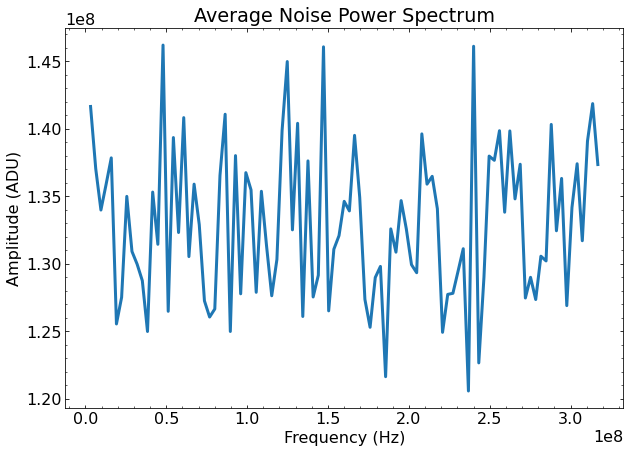

In [468]:
fig, ax = plt.subplots(figsize =(10, 7))
#for i in range(len(expkarr_og[0])-1):
    #ax.plot(kfreq[:n//2]*10e9, np.abs(fft([expkarr_og[j][i] for j in range(len(expkarr_og))]))[:n//2], color="peru", linewidth=0.5)
#ax.plot(kfreq[:n//2]*10e9, np.abs(kft[0:n//2])**2, label="Kernel")
#ax.plot(kfreq[:n//2]*10e9, np.abs(specavg[0:n//2]), color="red", label="Kernel + noise")
ax.plot(kfreq[1:n//2]*10e9, np.abs(specavg[1:n//2]))
#ax.plot(fftfreq(399, d=15.625)*10e9, np.abs(specavg), color="red")
ax.set_title("Average Noise Power Spectrum")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#plt.legend()
#ax.set_ylim(7e8,1e9)
#ax.set_xlim(-1e7,1e7)
plt.show()

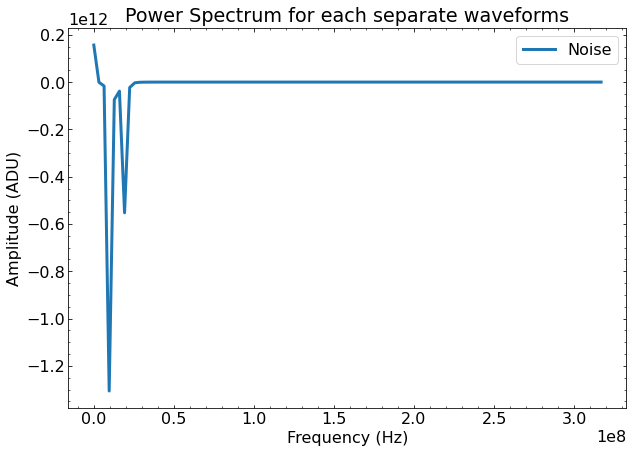

In [446]:
# Plot of the noise
# TODO: Not applicable

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(kfreq[:n//2]*10e9, np.abs(specavg[0:n//2])-np.abs(kft[0:n//2])**2, label="Noise")
ax.set_title("Power Spectrum for each separate waveforms")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
plt.legend()
#ax.set_ylim(-10,10)
#ax.set_xlim(-10,10)
plt.show()

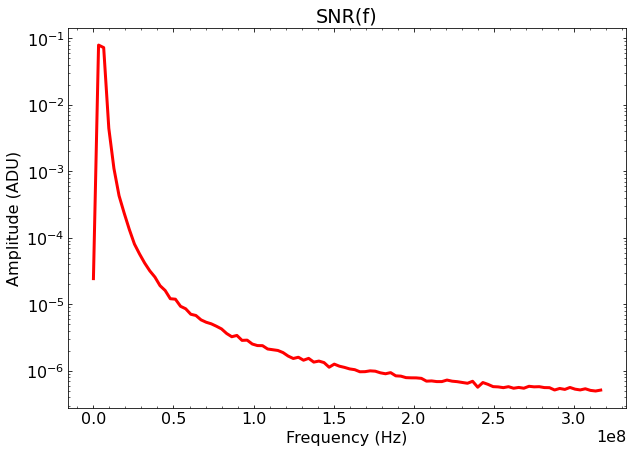

In [465]:
#specnoise = np.abs(kft)**2/(np.abs(specavg) - np.abs(kft))**2
#specnoise = np.abs(kft)**2/(np.abs(specavg)**2 - np.abs(kft)**2)
#specnoise = np.abs(kft)**2/np.abs(specavg - kft)**2
#specnoise = (kft*np.conj(kft))/(specavg - (kft*np.conj(kft)))

#specnoise = np.abs(kft)**2/(specavg - np.abs(kft)**2)
sft = np.hstack((sft, np.zeros(len(specavg) - len(sft)))) # zero pad the power spectrum to same length
specnoise = np.abs((sft*np.conj(sft))/(specavg))

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(kfreq[:n//2]*10e9, specnoise[0:n//2], color="red")
ax.set_title("SNR(f)")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (ADU)")
ax.set_yscale("log")
#ax.set_ylim(-10,40)
#ax.set_xlim(1.5e8,3.5e8)
plt.show()

In [441]:
# Wiener deconvolution with lambda as a function of frequency

def wiener_deconvolution(signal, kernel, lambd):
    #"lambd is the inverse SNR"
    kernel = np.hstack((kernel, np.zeros(len(signal) - len(kernel)))) # zero pad the kernel to same length
    # Limit the signal to the length of kernel
    #signal = signal[:len(kernel)]
    H = fft(kernel)
    deconvolved = np.real(ifft(fft(signal)*np.conj(H)/(H*np.conj(H) + lambd)))
    return deconvolved

In [442]:
# Deconvolve the set of waveform using the generated SNR function

dcsigs = []

for i in nsigs:
    dcsigs.append(wiener_deconvolution(i, kernel, 1/specnoise))
    #break
    #dcsigs.append(wiener_deconvolution(i, kernel, 1))

<ipython-input-442-9acd9f2a5de9>:6: RuntimeWarning: divide by zero encountered in true_divide
  dcsigs.append(wiener_deconvolution(i, kernel, 1/specnoise))


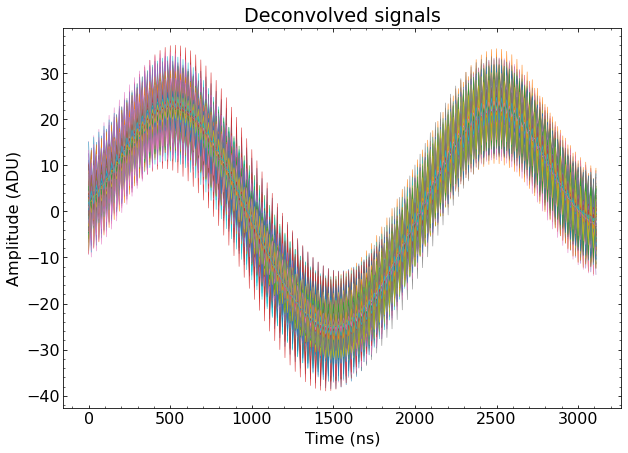

In [443]:
# frequency values are not assigned correctly

fig, ax = plt.subplots(figsize =(10, 7))
for i in dcsigs:
    ax.plot(sample, i[:200], linewidth=0.5)
ax.set_title("Deconvolved signals")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#ax.set_ylim(-10,40)
#ax.set_xlim(0,200)
plt.show()

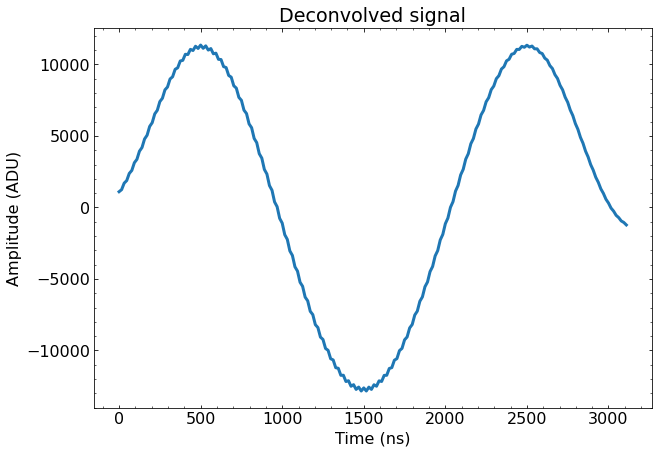

In [450]:
# Generate a final signal

decsig = np.zeros(shape=(200,), dtype=object)

for i in dcsigs:
    decsig += i[:200]

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(sample, decsig)
ax.set_title("Deconvolved signal")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#ax.set_ylim(-10,40)
#ax.set_xlim(0,200)
plt.show()

### Alternative Approach
Each waveforms have their own SNR function for deconvolution

ValueError: x and y must have same first dimension, but have shapes (200,) and (399,)

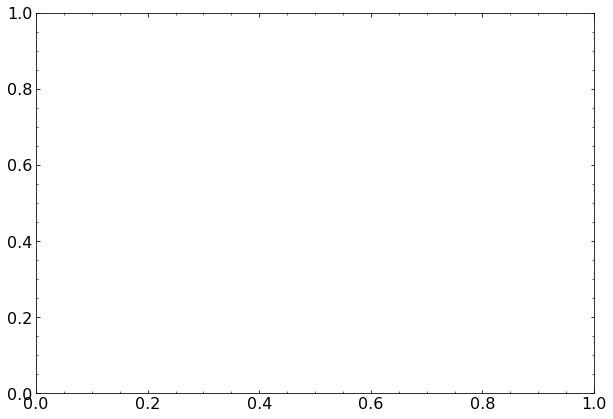

In [360]:
noise = nsig-signal

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(sample, noise, marker=".")
ax.set_title("Noise in Time Space")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#ax.set_ylim(-10,40)
#ax.set_xlim(1.5e8,3.5e8)
plt.show()

In [ ]:
fnoise = fft(nsig)
nfreq = fftfreq(len(fnoise), d=15.625)

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(nfreq[1:n//2]*10e9, fnoise[1:n//2]*np.conj(fnoise[1:n//2]), marker=".")
ax.set_title("Noise in Time Space")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
ax.set_yscale("log")
#ax.set_ylim(-100,1e5)
#ax.set_xlim(1.5e8,3.5e8)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(nfreq[:n//2]*10e9, fft(signal)[:n//2]*np.conj(fft(signal)[:n//2]), marker=".")
ax.set_title("Original Signal")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
ax.set_yscale("log")
#ax.set_ylim(-10,40)
#ax.set_xlim(1.5e8,3.5e8)
plt.show()

In [ ]:
diff = fnoise*np.conj(fnoise) - fft(signal)*np.conj(fft(signal))
#diff = (fnoise-fft(signal))*(np.conj(fnoise)-np.conj(fft(signal)))

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(nfreq[1:n//2]*10e9, diff[1:n//2], marker=".")
ax.set_title("Noise in Time Space")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#ax.set_ylim(-100,1e5)
#ax.set_xlim(1.5e8,3.5e8)
plt.show()

In [ ]:
# SNR

snrtrial = (fft(signal)*np.conj(fft(signal)))/diff

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(nfreq[1:n//2]*10e9, snrtrial[1:n//2], marker=".")
ax.set_title("Noise in Time Space")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#ax.set_ylim(-100,1e5)
#ax.set_xlim(1.5e8,3.5e8)
plt.show()

In [ ]:
# deconvolution

#decfun = wiener_deconvolution(nsig, signal, 1/snrtrial)
decfun = wiener_deconvolution(nsig, signal, 0)

#TODO: Sth's wrong with deconvolution function

fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(decfun, marker=".")
ax.set_title("Noise in Time Space")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (ADU)")
#ax.set_yscale("log")
#ax.set_ylim(-100,1e5)
#ax.set_xlim(1.5e8,3.5e8)
plt.show()